In [1]:
#Exploratory Analysis, Gathering Data Together
import numpy as np
import pandas as pd



qb_combine = pd.read_csv("Data/QB_combine_data.csv")
rb_combine = pd.read_csv("Data/RB_combine_data.csv")
wr_combine = pd.read_csv("Data/WR_combine_data.csv")
te_combine = pd.read_csv("Data/TE_combine_data.csv")

qb_bdays = pd.read_csv("Data/qb_bdays.csv", header = None, names = ['Index','Birthdate', 'Name'], index_col = 'Index')
rb_bdays = pd.read_csv("Data/rb_bdays.csv", header = None, names = ['Index','Birthdate', 'Name'], index_col = 'Index')
wr_bdays = pd.read_csv("Data/wr_bdays.csv", header = None, names = ['Index','Birthdate', 'Name'], index_col = 'Index')
te_bdays = pd.read_csv("Data/te_bdays.csv", header = None, names = ['Index','Birthdate', 'Name'], index_col = 'Index')

qb_stats = pd.read_csv("Data/qbdata.csv", thousands=',')
rb_stats = pd.read_csv("Data/rbdata_rush.csv", thousands=',')
wr_stats = pd.read_csv("Data/wrdata.csv", thousands=',')
te_stats = pd.read_csv("Data/tedata.csv", thousands=',')

In [2]:
qb_combine.head()

,Unnamed: 0,Player,College,Height,Weight,Hand_size,Arm_length,40_time,Bench,Vert,Broad,Shuttle,Year
0,0,1987,Steve Beuerlein,Notre Dame,10.00,NaN,23.0,93.0,4.63,4.63,4.63,4.63,1987
1,1,1987,Cody Carlson,Baylor,9.25,NaN,29.5,111.0,4.45,4.45,4.45,4.45,1987
2,2,1987,Rich Gannon,Delaware,9.50,NaN,32.5,110.0,4.11,4.11,4.11,4.11,1987
3,3,1987,Shawn Halloran,Boston College,10.25,NaN,23.5,94.0,4.53,4.53,4.53,4.53,1987
4,4,1987,Jim Harbaugh,Michigan,9.75,NaN,NaN,NaN,9.99,9.99,9.99,9.99,1987


In [3]:
qb_bdays.head()
#qb_bdays.dtypes
#qb_bdays['Birthdate']

,Birthdate,Name
Index,,
0,09/15/1961,D.Marino
1,04/17/1961,B.Esiason
2,03/07/1955,T.Kramer
3,06/28/1961,J.Schroeder
4,11/25/1963,B.Kosar


In [4]:
rb_stats.tail()
rb_stats[rb_stats['Player'] == 'E.Elliott']
#qb_stats.dtypes

,Unnamed: 0,Player,Team,DYAR,DVOA,Rushes,EYds,TD,Suc_rate,Year
2857,2857,E.Elliott,DAL,339,15.9%,322,1743,15,57%,2016
2960,2960,E.Elliott,DAL,205,11.1%,242,1228,7,57%,2017


In [5]:
#Drop Players with unknown birthdays, convert birthdays to datetimes
qb_bdays.dropna(inplace = True)
qb_bdays['Birthdate'] = pd.to_datetime(qb_bdays['Birthdate'], format  = '%m/%d/%Y', errors = 'coerce')

rb_bdays.dropna(inplace = True)
rb_bdays['Birthdate'] = pd.to_datetime(rb_bdays['Birthdate'], format  = '%m/%d/%Y', errors = 'coerce')

wr_bdays.dropna(inplace = True)
wr_bdays['Birthdate'] = pd.to_datetime(wr_bdays['Birthdate'], format  = '%m/%d/%Y', errors = 'coerce')

te_bdays.dropna(inplace = True)
te_bdays['Birthdate'] = pd.to_datetime(te_bdays['Birthdate'], format  = '%m/%d/%Y', errors = 'coerce')

#qb_bdays[qb_bdays['Birthdate'] != np.datetime64('NaT')]

In [6]:
#Convert Year in player stats to datetime
qb_stats['Year'] = pd.to_datetime(qb_stats['Year'], format = '%Y')
rb_stats['Year'] = pd.to_datetime(rb_stats['Year'], format = '%Y')
wr_stats['Year'] = pd.to_datetime(wr_stats['Year'], format = '%Y')
te_stats['Year'] = pd.to_datetime(te_stats['Year'], format = '%Y')
print(qb_stats.dtypes)

Unnamed: 0             int64
Player                object
Team                  object
DYAR                   int64
DVOA                  object
QBR                  float64
Passes                 int64
EYds                   int64
TD                     int64
INT                    int64
C%                    object
Year          datetime64[ns]
dtype: object


In [7]:
#left join stats with player birthdate
qb_bdays.rename(columns = {'Name':'Player'}, inplace = True)
qb_stats = qb_stats.merge(qb_bdays, on = 'Player', how = 'left')

rb_bdays.rename(columns = {'Name':'Player'}, inplace = True)
rb_stats = rb_stats.merge(rb_bdays, on = 'Player', how = 'left')

wr_bdays.rename(columns = {'Name':'Player'}, inplace = True)
wr_stats = wr_stats.merge(wr_bdays, on = 'Player', how = 'left')

te_bdays.rename(columns = {'Name':'Player'}, inplace = True)
te_stats = te_stats.merge(te_bdays, on = 'Player', how = 'left')
print(qb_stats.dtypes)

Unnamed: 0             int64
Player                object
Team                  object
DYAR                   int64
DVOA                  object
QBR                  float64
Passes                 int64
EYds                   int64
TD                     int64
INT                    int64
C%                    object
Year          datetime64[ns]
Birthdate     datetime64[ns]
dtype: object


In [8]:
# get player age at start of each season
qb_stats = qb_stats[~(qb_stats['Birthdate'].isnull())]
qb_stats['Age'] = (qb_stats['Year'] - qb_stats['Birthdate'])
qb_stats['Age'] = qb_stats['Age'].apply(lambda x: float(x.days)/365)

rb_stats = rb_stats[~(rb_stats['Birthdate'].isnull())]
rb_stats['Age'] = (rb_stats['Year'] - rb_stats['Birthdate'])
rb_stats['Age'] = rb_stats['Age'].apply(lambda x: float(x.days)/365)

wr_stats = wr_stats[~(wr_stats['Birthdate'].isnull())]
wr_stats['Age'] =(wr_stats['Year'] - wr_stats['Birthdate'])
wr_stats['Age'] = wr_stats['Age'].apply(lambda x: float(x.days)/365)

te_stats = te_stats[~(te_stats['Birthdate'].isnull())]
te_stats['Age'] =(te_stats['Year'] - te_stats['Birthdate'])
te_stats['Age'] = te_stats['Age'].apply(lambda x: float(x.days)/365)


In [9]:
print(qb_stats.head())
print(rb_stats.tail())
print(wr_stats.head())
print(te_stats.head())

   Unnamed: 0       Player  Team  DYAR   DVOA  QBR  Passes  EYds  TD  INT  \
0           0     D.Marino   MIA  1693  29.2%  NaN     643  5675  44   22   
1           1    B.Esiason   CIN  1268  28.6%  NaN     502  4303  24   17   
2           2     T.Kramer   MIN  1093  32.8%  NaN     404  3487  24   10   
3           3  J.Schroeder   WAS  1088  18.7%  NaN     572  4413  22   21   
4           4      B.Kosar  CLE1  1044  17.8%  NaN     571  4348  17    9   

      C%       Year  Birthdate        Age  
0  60.6% 1986-01-01 1961-09-15  24.312329  
1  58.3% 1986-01-01 1961-04-17  24.726027  
2  56.1% 1986-01-01 1955-03-07  30.843836  
3  51.2% 1986-01-01 1961-06-28  24.528767  
4  58.5% 1986-01-01 1963-11-25  22.117808  
      Unnamed: 0        Player Team  DYAR    DVOA  Rushes  EYds  TD Suc_rate  \
3046        3046       M.Davis  SEA   -38  -23.1%      69   161   0      NaN   
3047        3047  D.Washington  OAK   -55  -33.1%      57   103   2      NaN   
3048        3048     E.McGuire  N

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [11]:
qb_stats['DYAR'] = qb_stats['DYAR'].astype('int32')
rb_stats['DYAR'] = rb_stats['DYAR'].astype('int32')
wr_stats['DYAR'] = wr_stats['DYAR'].astype('int32')
te_stats['DYAR'] = te_stats['DYAR'].astype('int32')

qb_stats['EYds'] = qb_stats['EYds'].astype('int32')
rb_stats['EYds'] = rb_stats['EYds'].astype('int32')
wr_stats['EYds'] = wr_stats['EYds'].astype('int32')
te_stats['EYds'] = te_stats['EYds'].astype('int32')


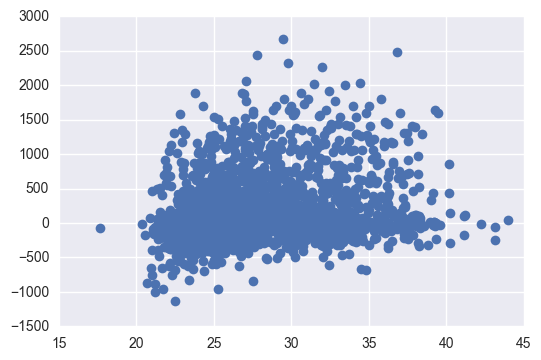

In [12]:
#plot age vs eyards
plt.plot(qb_stats['Age'],qb_stats['DYAR'], 'bo')
plt.show()

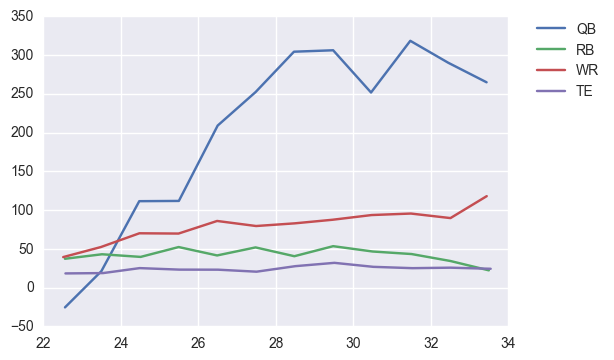

In [13]:
#group by age ranges, plot mean eyds
age_groups_qb = qb_stats.groupby(pd.cut(qb_stats['Age'],np.arange(22,35,1))).mean()
age_groups_rb = rb_stats.groupby(pd.cut(rb_stats['Age'],np.arange(22,35,1))).mean()
age_groups_wr = wr_stats.groupby(pd.cut(wr_stats['Age'],np.arange(22,35,1))).mean()
age_groups_te = te_stats.groupby(pd.cut(te_stats['Age'],np.arange(22,35,1))).mean()

qb = plt.plot(age_groups_qb['Age'], age_groups_qb['DYAR'], label = 'QB')
rb = plt.plot(age_groups_rb['Age'], age_groups_rb['DYAR'], label = 'RB')
wr = plt.plot(age_groups_wr['Age'], age_groups_wr['DYAR'], label = 'WR')
te = plt.plot(age_groups_te['Age'], age_groups_te['DYAR'], label = 'TE')

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [14]:
#Get Yearly Difference
qb_stats['EYds_1'] = qb_stats.sort_values('Age').groupby('Player')['EYds'].shift(1)
qb_stats['DYAR_1'] = qb_stats.sort_values('Age').groupby('Player')['DYAR'].shift(1)

In [15]:
#Dan Marino Example
qb_stats[(qb_stats['Player'] == 'D.Marino')]

,Unnamed: 0,Player,Team,DYAR,DVOA,QBR,Passes,EYds,TD,INT,C%,Year,Birthdate,Age,EYds_1,DYAR_1
0,0,D.Marino,MIA,1693,29.2%,NaN,643,5675,44,22,60.6%,1986-01-01,1961-09-15,24.312329,NaN,NaN
65,65,D.Marino,MIA,1224,30.4%,NaN,456,4043,26,13,59.2%,1987-01-01,1961-09-15,25.312329,5675.0,1693.0
116,116,D.Marino,MIA,1476,24.6%,NaN,618,5334,28,22,58.4%,1988-01-01,1961-09-15,26.312329,4043.0,1224.0
190,190,D.Marino,MIA,875,13.0%,NaN,560,4111,24,22,56.3%,1989-01-01,1961-09-15,27.315068,5334.0,1476.0
248,248,D.Marino,MIA,1265,25.4%,NaN,542,4507,21,11,58.1%,1990-01-01,1961-09-15,28.315068,4111.0,875.0
308,308,D.Marino,MIA,1076,17.8%,NaN,578,4479,25,13,58.0%,1991-01-01,1961-09-15,29.315068,4507.0,1265.0
366,366,D.Marino,MIA,1376,25.7%,NaN,581,4875,24,15,59.9%,1992-01-01,1961-09-15,30.315068,4479.0,1076.0
451,451,D.Marino,MIA,401,29.8%,NaN,159,1337,8,3,60.7%,1993-01-01,1961-09-15,31.317808,4875.0,1376.0
498,498,D.Marino,MIA,1349,21.6%,NaN,631,5147,30,17,63.0%,1994-01-01,1961-09-15,32.317808,1337.0,401.0
570,570,D.Marino,MIA,793,13.8%,NaN,503,3646,24,15,64.9%,1995-01-01,1961-09-15,33.317808,5147.0,1349.0


In [16]:
qb_stats['DYAR_diff'] = (qb_stats['DYAR'] - qb_stats['DYAR_1']) / qb_stats['DYAR_1']

In [17]:
#mask = (qb_stats['DYAR_diff'] < 2.0) & (qb_stats['DYAR_diff'] > -2.0)
#qb_stats = qb_stats[mask]
qb_stats_pass = qb_stats[(qb_stats['Passes'] > 300) & (qb_stats['DYAR_diff'] < 3.0) & (qb_stats['DYAR_diff'] > -3.0) ]

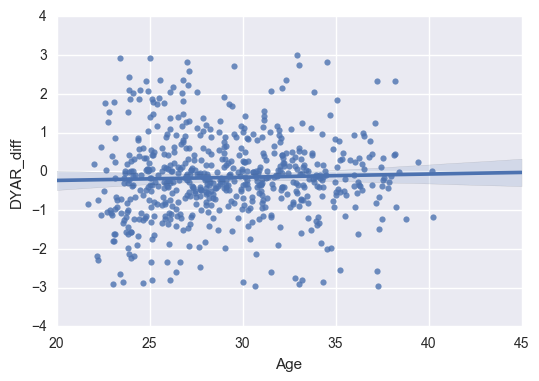

In [18]:
sns.regplot(x="Age", y="DYAR_diff", data=qb_stats_pass, scatter = True)
plt.show()

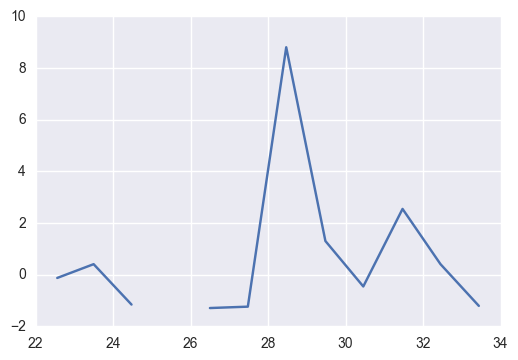

In [19]:
plt.figure(1)
age_groups_qb_2 = qb_stats.groupby(pd.cut(qb_stats['Age'],np.arange(22,35,1))).mean()
qb = plt.plot(age_groups_qb_2['Age'], age_groups_qb_2['DYAR_diff'], label = 'QB')
plt.show()

In [20]:
#Get Yearly Difference
rb_stats['EYds_1'] = rb_stats.sort_values('Age').groupby('Player')['EYds'].shift(1)
rb_stats['DYAR_1'] = rb_stats.sort_values('Age').groupby(['Player','Birthdate'])['DYAR'].shift(1)

In [21]:
rb_stats['DYAR_diff'] = (rb_stats['DYAR'] - rb_stats['DYAR_1']) / rb_stats['DYAR_1']

In [22]:
mask = (rb_stats['DYAR_diff'] < 3.0) & (rb_stats['DYAR_diff'] > -3.0)
rb_stats_mask = rb_stats[mask & (rb_stats['Rushes'] > 50)]

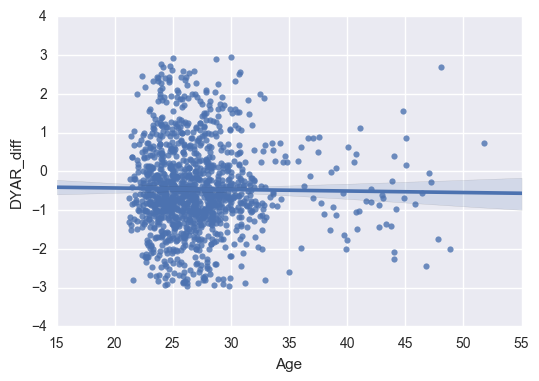

In [23]:
sns.regplot(x="Age", y="DYAR_diff", data=rb_stats_mask, scatter = True)
plt.show()

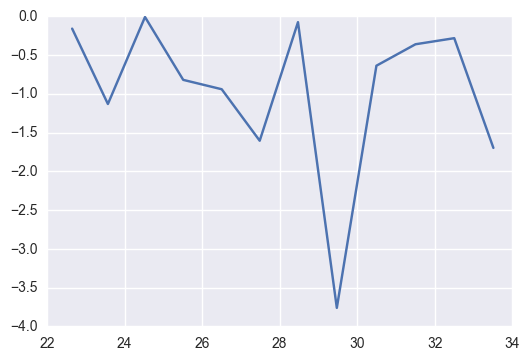

In [24]:
rb_stats_nonan = rb_stats.replace([np.inf, -np.inf], np.nan).dropna(subset = ['DYAR_diff'])
plt.figure(1)
age_groups_rb_2 = rb_stats_nonan.groupby(pd.cut(rb_stats_nonan['Age'],np.arange(22,35,1))).mean()
rb = plt.plot(age_groups_rb_2['Age'], age_groups_rb_2['DYAR_diff'], label = 'RB')
plt.show()

## RB Rookies

In [25]:
rb_stats['First_Season'] = pd.isnull(rb_stats['DYAR_1'])

In [26]:
mask_rb = (rb_stats['First_Season'] == True) & (rb_stats['Age'] < 24)
rb_rooks = rb_stats[mask_rb]['Player'].values
#rb_rooks

In [27]:
rb_stats['DYAR_2'] = rb_stats.sort_values('Age').groupby(['Player','Birthdate'])['DYAR'].shift(2)
rb_rts = rb_stats[rb_stats['Player'].isin(rb_rooks) & (pd.isnull(rb_stats['DYAR_2']))]
rb_rts.sort_values(['Player','Age'])
#rb_rooks = rb_rts[rb_rts['First_Season'] == True]
#rb_sophs = rb_rts[~pd.isnull(rb_rts['DYAR_1'])]

,Unnamed: 0,Player,Team,DYAR,DVOA,Rushes,EYds,TD,Suc_rate,Year,Birthdate,Age,EYds_1,DYAR_1,DYAR_diff,First_Season,DYAR_2
2788,2788,A.Abdullah,DET,-2,-8.9%,143,505,2,51%,2015-01-01,1993-06-13,21.567123,NaN,NaN,NaN,True,NaN
2989,2989,A.Abdullah,DET,-9,-10.0%,165,525,4,35%,2017-01-01,1993-06-13,23.569863,505.0,-2.0,3.500000,False,NaN
2531,2531,A.Allen,CHI,7,-2.3%,27,110,1,NaN,2012-01-01,1989-04-30,22.687671,NaN,NaN,NaN,True,NaN
2693,2693,A.Blue,HOU,-88,-21.3%,169,449,3,39%,2014-01-01,1991-04-27,22.698630,NaN,NaN,NaN,True,NaN
2773,2773,A.Blue,HOU,61,-0.2%,183,726,2,45%,2015-01-01,1991-04-27,23.698630,449.0,-88.0,-1.693182,False,NaN
2036,2036,A.Bradshaw,NYG,59,50.8%,23,182,1,NaN,2007-01-01,1986-03-20,20.800000,NaN,NaN,NaN,True,NaN
2148,2148,A.Bradshaw,NYG,15,-3.1%,67,262,1,NaN,2008-01-01,1986-03-20,21.800000,182.0,59.0,-0.745763,False,NaN
2231,2231,A.Brown,DET,21,16.0%,27,113,0,NaN,2009-01-01,1985-10-11,23.241096,NaN,NaN,NaN,True,NaN
2498,2498,A.Brown,NYG,185,45.6%,73,593,8,NaN,2012-01-01,1985-10-11,26.241096,113.0,21.0,7.809524,False,NaN
1599,1599,A.Cason,DET,-7,-15.2%,26,67,0,NaN,2002-01-01,1979-07-12,22.490411,NaN,NaN,NaN,True,NaN


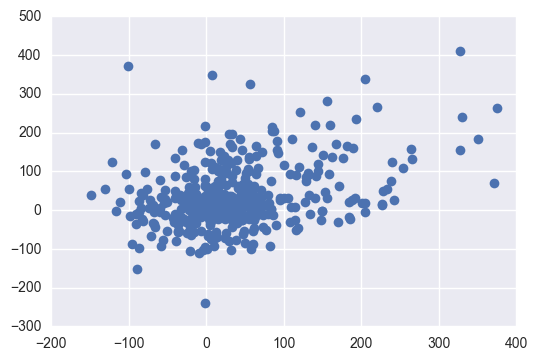

In [28]:
plt.plot(rb_rts['DYAR'],rb_rts['DYAR_1'], 'ob')
plt.show()

In [29]:
rb_stats['DVOA'] = rb_stats['DVOA'].str.extract(r"(-?\d+\.\d)%")
#pd.get_dummies(rb_stats['Suc_rate'])
rb_stats['Suc_rate'] = rb_stats['Suc_rate'].str.extract(r"(\d+)%")
rb_stats['Suc_rate'] = rb_stats['Suc_rate'].fillna(0)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  if __name__ == '__main__':
//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  app.launch_new_instance()
